<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub?scriptVersionId=133970612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа

Ранжируем акций из списка голубых фишек Московской биржи по коэффициенту Шарпа для рублевых курсов (есть аналог для абсолютных курсов https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp). Ранжирование позволяет выявить самые выгодные для вложения акции в рублевом выражении. Рейтинги считаем для разных временных промежутков от месяца до 5 лет.

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

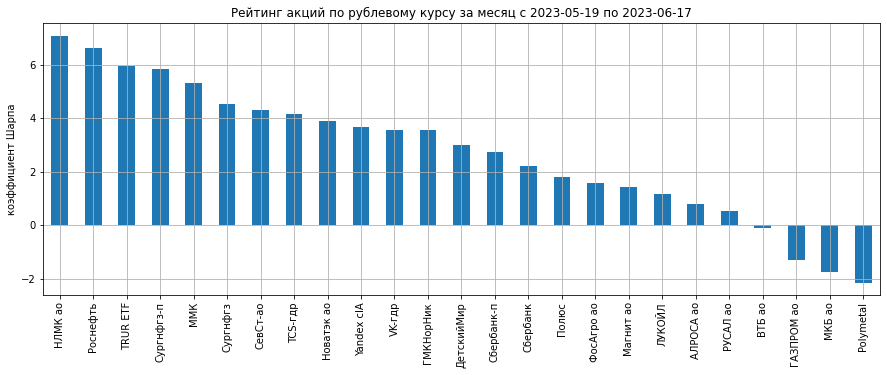

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за месяц:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**НЛМК ао**|7.095%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|**Роснефть**|6.629%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**TRUR ETF**|5.951%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Сургнфгз-п**|5.844%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**ММК**|5.315%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ММК)|
|...|...|...|
|**РУСАЛ ао**|0.542%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ВТБ ао**|-0.095%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**ГАЗПРОМ ао**|-1.287%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|
|**МКБ ао**|-1.726%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|**Polymetal**|-2.14%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за месяц**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-месяц)

# За квартал

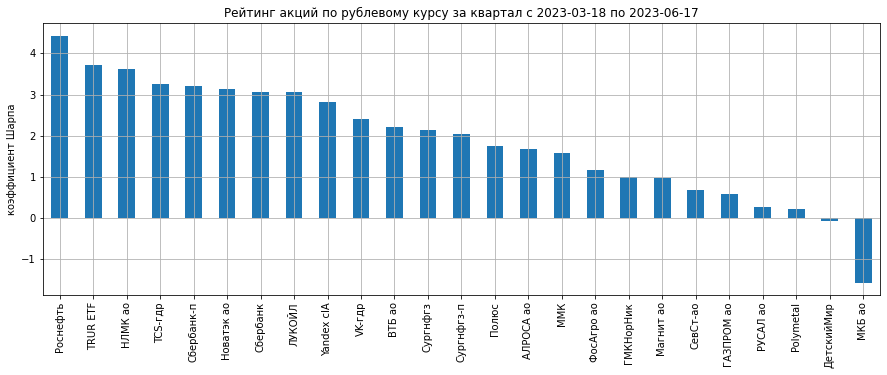

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за квартал:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Роснефть**|4.434%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**TRUR ETF**|3.716%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**НЛМК ао**|3.61%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|**TCS-гдр**|3.256%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**Сбербанк-п**|3.21%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|...|...|...|
|**ГАЗПРОМ ао**|0.568%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|
|**РУСАЛ ао**|0.262%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**Polymetal**|0.203%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|
|**ДетскийМир**|-0.075%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**МКБ ао**|-1.58%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за квартал**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-квартал)

# За полгода

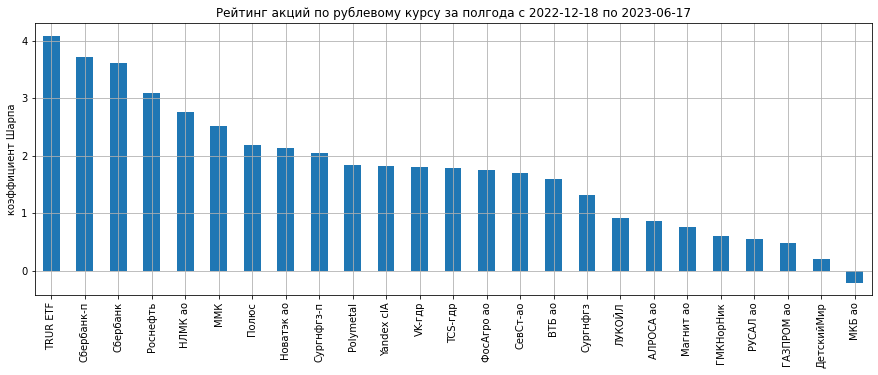

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за полгода:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**TRUR ETF**|4.094%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Сбербанк-п**|3.729%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**Сбербанк**|3.612%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**Роснефть**|3.1%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**НЛМК ао**|2.772%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|...|...|...|
|**ГМКНорНик**|0.599%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**РУСАЛ ао**|0.552%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ГАЗПРОМ ао**|0.477%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|
|**ДетскийМир**|0.2%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**МКБ ао**|-0.206%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за полгода**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-полгода)

# За год

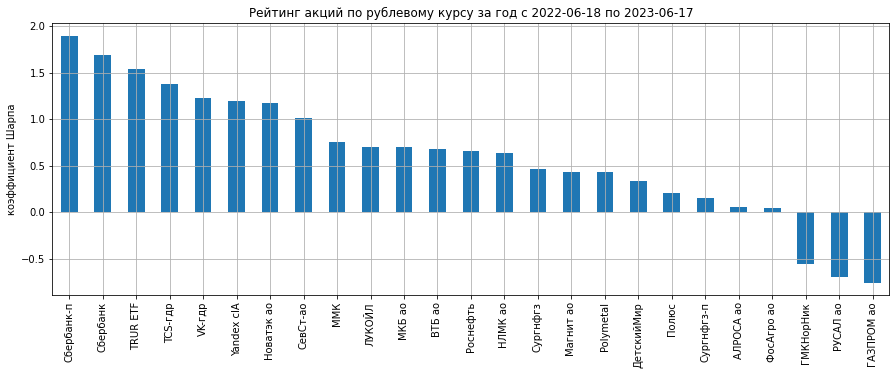

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за год:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Сбербанк-п**|1.9%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**Сбербанк**|1.695%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**TRUR ETF**|1.54%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**TCS-гдр**|1.384%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**VK-гдр**|1.228%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|...|...|...|
|**АЛРОСА ао**|0.058%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**ФосАгро ао**|0.046%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**ГМКНорНик**|-0.553%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**РУСАЛ ао**|-0.695%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ГАЗПРОМ ао**|-0.758%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за год**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-год)

# За 2 года

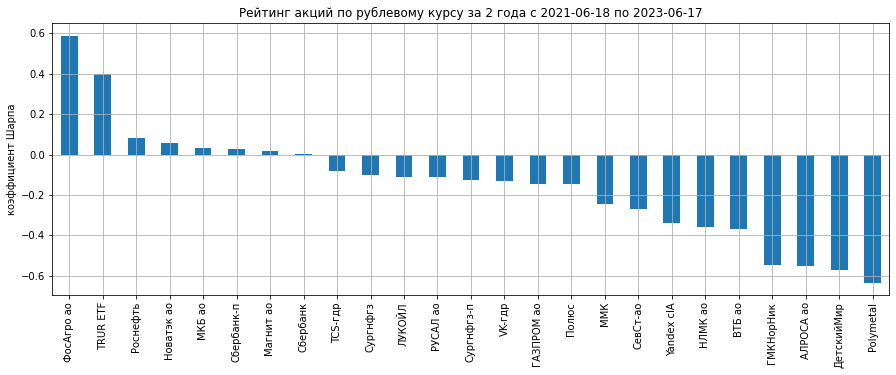

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за 2 года:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|0.588%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TRUR ETF**|0.398%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Роснефть**|0.083%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**Новатэк ао**|0.059%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Новатэк-ао)|
|**МКБ ао**|0.031%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|...|...|...|
|**ВТБ ао**|-0.368%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**ГМКНорНик**|-0.548%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**АЛРОСА ао**|-0.55%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**ДетскийМир**|-0.57%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**Polymetal**|-0.634%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 2 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-2-года)

# За 3 года

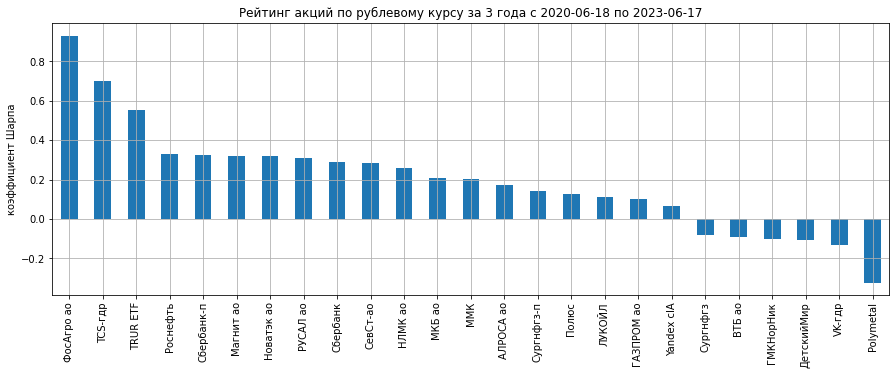

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за 3 года:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|0.931%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TCS-гдр**|0.703%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**TRUR ETF**|0.556%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Роснефть**|0.332%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**Сбербанк-п**|0.325%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|...|...|...|
|**ВТБ ао**|-0.091%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**ГМКНорНик**|-0.099%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**ДетскийМир**|-0.108%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**VK-гдр**|-0.13%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**Polymetal**|-0.323%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 3 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-3-года)

# За 5 лет

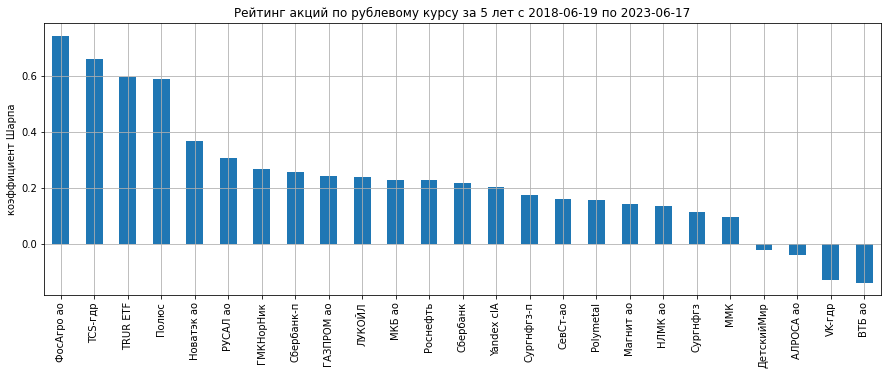

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за 5 лет:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|0.745%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TCS-гдр**|0.662%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**TRUR ETF**|0.598%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Полюс**|0.589%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Полюс)|
|**Новатэк ао**|0.37%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Новатэк-ао)|
|...|...|...|
|**ММК**|0.094%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ММК)|
|**ДетскийМир**|-0.024%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**АЛРОСА ао**|-0.041%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**VK-гдр**|-0.13%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**ВТБ ао**|-0.14%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-5-лет)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu

# меню проекта печатаем
abscur_menu.print_menu()

# рублевые курсы акций подкачиваем
s_rub = pd.read_csv("/kaggle/input/mmvb-blue-fishki/close_table.csv",index_col=0,parse_dates=['Dates'])

# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_rub.asfreq(freq="D").index[-per]
    date_finish = s_rub.index[-1]
    
    res = sharpe_ratio(s_rub[s_rub.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг акций по рублевому курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за " + title_per + ":**\n\n"
    text += "|Инструмент|Коэф.Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(5):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))